<a href="https://colab.research.google.com/github/camilogrey/1html/blob/main/Copy_of_Estadistica_Descriptiva_Personal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Estadistica descriptiva

El conjunto de datos contiene la informacion de los resultados de las pruebas del ICFES en 2021 II, el objetivo del analisis es conocer las puntuaciones por diferentes variables cualitativas para las diferentes áreas.

## Breve repaso de algunas funciones utiles para hacer resumenes de variables

#### Funciones anónimas (Funciones lambda)

son funciones que no tienen nombre y nos sirven para poder incluirlas sin definirlas dentro de métodos de librerías, ej pandas.

```
def suma (x, y):
  return x + y
```

Equivalente en funciones lambda:

```
lambda x, y: x + y
```

#### Operaciones en dataframes y listas

Existen tres métodos fundamentales que nos pueden servir para hacer operaciones sobre filas, columnas o listas de elementos que son:

**apply:** Nos sirve para modificar varias columnas o filas de un dataframe como le pidamos a través de una funcion

sintaxis: 

```
dataframe.apply(funcion, axis = 0/1)
``` 
si axis == 1, entonces se hace la operacion por columnas y si axis == 0 se hace la operacion por filas

**map:** Es una operacion sobre una lista y mapea todos los valores de la lista en una nueva lista el resultado de aplicar una funcion

**reduce:** Es una operacion de la librería functools, y mapea todos los resultados de una lista en un unico valor de resumen



In [ ]:
datos_prueba = {'var1': [1, 3, 4, 6], 'var2': [3, 5, 7, 8]}
pandas_prueba = pd.DataFrame(datos_prueba)

In [ ]:
# Ejemplo apply: Multiplicar todas las columnas/filas por 2
print(pandas_prueba)
pandas_prueba.apply(lambda x: x * 2, axis= 0 )

   var1  var2
0     1     3
1     3     5
2     4     7
3     6     8


,var1,var2
0,2,6
1,6,10
2,8,14
3,12,16


In [ ]:
## Ejmplo de reduce:

import functools
res = functools.reduce(lambda x, y: x * y, pandas_prueba['var1'])

print(res)
1*3*4*6

72


72

In [ ]:
## Ejemplo de map
pandas_prueba['var1'].map(lambda x: x*8)


0     8
1    24
2    32
3    48
Name: var1, dtype: int64

# Ejercicio 1

1. Leer el archivo contenido en el siguiente json:

https://www.datos.gov.co/resource/kgxf-xxbe.json



In [ ]:
# Solucion:

import json
import urllib
import urllib.request, json
import pandas as pd

In [ ]:
#Forma 1
url_datos = "https://www.datos.gov.co/resource/kgxf-xxbe.json?$limit=50000"
with urllib.request.urlopen(url_datos) as url_datos_pedir:
  data = json.loads(url_datos_pedir.read().decode())

In [ ]:
datos_icfes = pd.DataFrame(data)

In [ ]:
# Forma 2
datos_icfes2 = pd.read_json('https://www.datos.gov.co/resource/kgxf-xxbe.json?$limit=10000')

In [ ]:
datos_icfes3 = datos_icfes2.reset_index()

# Ejercicio 2

¿Cuántos estudiantes, de los 10.000 de nuestra muestra pertenecen a colegios rurales y cuantos a urbanos?

In [ ]:
datos_icfes3[['cole_area_ubicacion', 'index']].groupby('cole_area_ubicacion').count().reset_index()

,cole_area_ubicacion,index
0,RURAL,1326
1,URBANO,8669


In [ ]:
salida = datos_icfes2['cole_area_ubicacion'].value_counts()
pd.DataFrame(salida)

,cole_area_ubicacion
URBANO,8669
RURAL,1326


In [ ]:
pd.crosstab(index = datos_icfes2['cole_area_ubicacion'], columns = [])

,__dummy__
cole_area_ubicacion,
RURAL,1326
URBANO,8669


In [ ]:
datos_icfes2[['cole_area_ubicacion']]

,cole_area_ubicacion
0,URBANO
1,URBANO
2,URBANO
3,RURAL
4,RURAL
...,...
9995,URBANO
9996,URBANO
9997,URBANO
9998,URBANO


In [ ]:
#Reset_index
tabla_colegios = datos_icfes2[['cole_area_ubicacion', 'estu_tipodocumento']].groupby('cole_area_ubicacion').count().reset_index()
tabla_colegios['cole_area_ubicacion']
# datos_icfes2.columns


0     RURAL
1    URBANO
Name: cole_area_ubicacion, dtype: object

In [ ]:
# Calculando la tabla de frecuencias
tabla_area = datos_icfes3[['cole_area_ubicacion', 'index']].groupby('cole_area_ubicacion').count().reset_index()
total = tabla_area['index'].sum()


In [ ]:
#Calculando los porcentajes
tabla_area['Porcentaje'] = tabla_area['index'].map(lambda x: x/total*100).round(1)
tabla_area

,cole_area_ubicacion,index,Porcentaje
0,RURAL,1326,13.3
1,URBANO,8669,86.7


In [ ]:
# Resumenes de más de una variable categorica
# Ej, género y ubicación del colegio

tabla_area_genero = datos_icfes3[['cole_area_ubicacion', 'estu_genero', 'estu_tipodocumento']].groupby(['cole_area_ubicacion', 'estu_genero']).count()
tabla_area_genero.reset_index()

,cole_area_ubicacion,estu_genero,estu_tipodocumento
0,RURAL,F,713
1,RURAL,M,612
2,URBANO,F,4863
3,URBANO,M,3801


## Gráficos para variables cualitativas

Como sabemos, las variables cualitativas se caracterizan por contar con categorías. Los gráficos muestran las distribuciones de las categorías en las diferentes variables.

Podemos hacer gráficos de barras o gráficos de tortas. La recomendacion es que NO se hagan gráficos de tortas con pocos valores. Por lo menos 10 daticos por categoría.

In [ ]:
# Importando la librería de gráficos
import seaborn as sns

tips = sns.load_dataset("tips")
# ax = sns.barplot(x="day", y="total_bill", data=tips)
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


Text(0.5, 1.0, 'Numero de estudiantes por ubicacion geográfica')

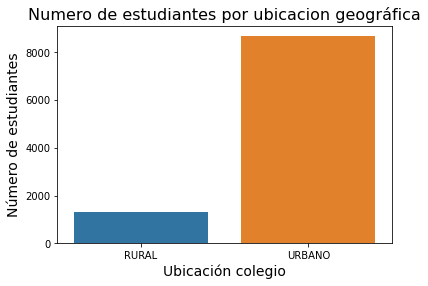

In [ ]:
# Graficos de barras
tabla_area
grafico_areas = sns.barplot(x = 'cole_area_ubicacion', y= 'index', data = tabla_area)
grafico_areas.set_xlabel("Ubicación colegio", fontsize = 14)
grafico_areas.set_ylabel("Número de estudiantes", fontsize = 14)
grafico_areas.axes.set_title('Numero de estudiantes por ubicacion geográfica', fontsize=16)
# grafico_areas.set(xlabel ="Ubicación colegio", ylabel = "Total estudiantes", title ='Estudiantes por ubicación geográfica del colegio')

([<matplotlib.patches.Wedge at 0x7f23ab6d1b50>,
 [Text(1.0053679774626623, 0.44635773757451114, 'RURAL'),
  Text(-1.005367998358175, -0.44635769050983887, 'URBANO')],
 [Text(0.548382533161452, 0.24346785685882422, '13.3%'),
  Text(-0.5483825445590045, -0.24346783118718482, '86.7%')])

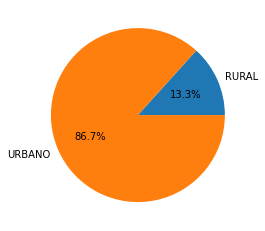

In [ ]:
## Grafico de pastel
import matplotlib.pyplot as plt
plt.pie(tabla_area['Porcentaje'], labels = tabla_area['cole_area_ubicacion'], autopct='%.1f%%')

In [ ]:
datos_icfes3.columns

Index(['index', 'periodo', 'estu_tipodocumento', 'estu_consecutivo',
       'cole_area_ubicacion', 'cole_bilingue', 'cole_calendario',
       'cole_caracter', 'cole_cod_dane_establecimiento', 'cole_cod_dane_sede',
       'cole_cod_depto_ubicacion', 'cole_cod_mcpio_ubicacion',
       'cole_codigo_icfes', 'cole_depto_ubicacion', 'cole_genero',
       'cole_jornada', 'cole_mcpio_ubicacion', 'cole_naturaleza',
       'cole_nombre_establecimiento', 'cole_nombre_sede',
       'cole_sede_principal', 'estu_cod_depto_presentacion',
       'estu_cod_mcpio_presentacion', 'estu_cod_reside_depto',
       'estu_cod_reside_mcpio', 'estu_depto_presentacion', 'estu_depto_reside',
       'estu_estadoinvestigacion', 'estu_estudiante', 'estu_fechanacimiento',
       'estu_genero', 'estu_mcpio_presentacion', 'estu_mcpio_reside',
       'estu_nacionalidad', 'estu_pais_reside', 'estu_privado_libertad',
       'fami_cuartoshogar', 'fami_educacionmadre', 'fami_educacionpadre',
       'fami_estratovivienda', 'f

## Medidas de resumen para variables de tipo cuantitativo

Las variables de naturaleza cuantitativa (cantidades) pueden resumirse a través de medidas de tendencia central, de dispersión y de localización.

Dichas medidas resultan ser valores numericos altamente interpretables y nos dan una idea de la forma de la distribución.

In [ ]:
import numpy as np

a = {'var1' : [1, 4, 8, 6, 9, 45, 57, 25, 45, 12, 9], 'var2' : [17, 54, 38, None, 99, 454, 27, 35, 45, 12, 9]}

aa = pd.DataFrame(a)
print(aa)
aa.describe()

    var1   var2
0      1   17.0
1      4   54.0
2      8   38.0
3      6    NaN
4      9   99.0
5     45  454.0
6     57   27.0
7     25   35.0
8     45   45.0
9     12   12.0
10     9    9.0


,var1,var2
count,11.000000,10.000000
mean,20.090909,79.000000
std,19.765903,134.313067
min,1.000000,9.000000
25%,7.000000,19.500000
50%,9.000000,36.500000
75%,35.000000,51.750000
max,57.000000,454.000000


In [ ]:
datos_icfes3.describe()

,index,periodo,cole_cod_dane_establecimiento,cole_cod_dane_sede,cole_cod_depto_ubicacion,cole_cod_mcpio_ubicacion,cole_codigo_icfes,estu_cod_depto_presentacion,estu_cod_mcpio_presentacion,estu_cod_reside_depto,estu_cod_reside_mcpio,punt_ingles,punt_matematicas,punt_sociales_ciudadanas,punt_c_naturales,punt_lectura_critica,punt_global
count,10000.00000,10000.000000,9.997000e+03,9.999000e+03,10000.00000,10000.000000,9965.000000,10000.000000,10000.000000,9931.000000,9931.000000,10000.000000,10000.000000,5615.000000,5615.000000,5615.000000,5615.000000
mean,4999.50000,20146.518100,2.098542e+11,2.105298e+11,32.66100,32880.353100,104997.715906,32.643000,32838.766900,32.647165,32866.073104,48.302227,48.970954,48.993945,50.389314,51.760285,252.087622
std,2886.89568,31.108221,9.712958e+10,9.847282e+10,26.67662,26696.655706,130331.688588,26.740368,26763.329018,26.699615,26721.858891,12.049656,11.649906,11.565783,10.532906,10.149447,49.404395
min,0.00000,20101.000000,3.110010e+10,0.000000e+00,5.00000,5001.000000,59.000000,5.000000,5001.000000,5.000000,5001.000000,-1.000000,0.000000,17.000000,16.000000,0.000000,114.000000
25%,2499.75000,20122.000000,1.171740e+11,1.173800e+11,11.00000,11001.000000,30593.000000,11.000000,11001.000000,11.000000,11001.000000,41.000000,41.000000,40.000000,43.000000,44.000000,215.000000
50%,4999.50000,20142.000000,1.734490e+11,1.737700e+11,20.00000,20710.000000,82503.000000,20.000000,20203.000000,20.000000,20550.000000,46.000000,48.090000,49.000000,50.000000,51.000000,249.000000
75%,7499.25000,20172.000000,3.110010e+11,3.110010e+11,54.00000,54438.000000,128595.000000,54.000000,54498.000000,54.000000,54498.000000,54.000000,56.000000,57.000000,57.000000,59.000000,284.000000
max,9999.00000,20211.000000,5.684320e+11,8.470010e+11,99.00000,99773.000000,752592.000000,99.000000,99773.000000,99.000000,99773.000000,102.960000,100.000000,97.000000,100.000000,100.000000,440.000000


## Ejercicio

1. Calcular las medidas de tendencia central, de dispersión y posición para las puntuaciones por area y global de los datos de el examen del ICFES.

2. Interpretar los resultados obtenidos

In [ ]:
tabla_calificaciones = datos_icfes2[['punt_ingles', 'punt_matematicas',
       'punt_sociales_ciudadanas', 'punt_c_naturales', 'punt_lectura_critica',
       'punt_global']]

tabla_calificaciones.describe()

,punt_ingles,punt_matematicas,punt_sociales_ciudadanas,punt_c_naturales,punt_lectura_critica,punt_global
count,10000.000000,10000.000000,5615.000000,5615.000000,5615.000000,5615.000000
mean,48.302227,48.970954,48.993945,50.389314,51.760285,252.087622
std,12.049656,11.649906,11.565783,10.532906,10.149447,49.404395
min,-1.000000,0.000000,17.000000,16.000000,0.000000,114.000000
25%,41.000000,41.000000,40.000000,43.000000,44.000000,215.000000
50%,46.000000,48.090000,49.000000,50.000000,51.000000,249.000000
75%,54.000000,56.000000,57.000000,57.000000,59.000000,284.000000
max,102.960000,100.000000,97.000000,100.000000,100.000000,440.000000


In [ ]:
tabla_calificaciones.shape

(10000, 6)

In [ ]:
tabla_calificaciones

,punt_ingles,punt_matematicas,punt_sociales_ciudadanas,punt_c_naturales,punt_lectura_critica,punt_global
0,53.32,40.78,NaN,NaN,NaN,NaN
1,37.10,46.77,NaN,NaN,NaN,NaN
2,94.00,88.00,NaN,NaN,NaN,NaN
3,71.00,66.00,70.0,65.0,69.0,339.0
4,71.00,66.00,70.0,65.0,69.0,339.0
...,...,...,...,...,...,...
9995,59.00,59.00,45.0,49.0,50.0,257.0
9996,42.00,44.00,40.0,43.0,38.0,207.0
9997,46.00,49.00,53.0,52.0,60.0,265.0
9998,36.00,43.00,NaN,NaN,NaN,NaN


In [ ]:
type(tabla_calificaciones['punt_ingles'][2])

numpy.float64

In [ ]:
tabla_calificaciones_req = datos_icfes[['punt_ingles', 'punt_matematicas',
       'punt_sociales_ciudadanas', 'punt_c_naturales', 'punt_lectura_critica',
       'punt_global']]

In [ ]:
tabla_calificaciones_req.describe()

,punt_ingles,punt_matematicas,punt_sociales_ciudadanas,punt_c_naturales,punt_lectura_critica,punt_global
count,50000,50000,28384,28384,28384,28384
unique,241,247,82,80,76,317
top,43,49,47,52,54,238
freq,3871,2214,1040,1060,1234,281


In [ ]:
tabla_calificaciones_req_bien = tabla_calificaciones_req.astype('float')

In [ ]:
tabla_calificaciones_req_bien.describe()

,punt_ingles,punt_matematicas,punt_sociales_ciudadanas,punt_c_naturales,punt_lectura_critica,punt_global
count,50000.000000,50000.000000,28384.000000,28384.000000,28384.000000,28384.000000
mean,48.278080,49.002530,49.080327,50.403150,51.889445,252.460788
std,11.947703,11.793837,11.615162,10.550339,10.172405,49.689934
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,41.000000,41.000000,40.000000,43.000000,44.000000,216.000000
50%,46.000000,48.170000,49.000000,50.000000,52.000000,249.000000
75%,53.730000,56.000000,57.000000,57.000000,59.000000,286.000000
max,117.290000,124.000000,100.000000,100.000000,100.000000,467.000000


In [ ]:
cve = 11.947703/48.278080

24.747676378182394

In [ ]:
type(tabla_calificaciones_req['punt_ingles'][2])

str

In [ ]:
from dataclasses import replace
a = '94,12'
float(a.replace(',', '.'))

94.12

In [ ]:
data_prueba = pd.DataFrame({'v1': ['12,4', '21,8'], 'v2': ['52,8', '31,8']})
data_prueba2 = data_prueba.apply(lambda x: x.str.replace(',', '.'))
data_prueba2

,v1,v2
0,12.4,52.8
1,21.8,31.8


In [ ]:
data_prueba.replace(to_replace=r',', value='.', regex=True, inplace=True)

In [ ]:
data_prueba

,v1,v2
0,12.4,52.8
1,21.8,31.8


In [ ]:
tabla_calificaciones_req_bien.describe()

,punt_ingles,punt_matematicas,punt_sociales_ciudadanas,punt_c_naturales,punt_lectura_critica,punt_global
count,50000.000000,50000.000000,28384.000000,28384.000000,28384.000000,28384.000000
mean,48.278080,49.002530,49.080327,50.403150,51.889445,252.460788
std,11.947703,11.793837,11.615162,10.550339,10.172405,49.689934
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,41.000000,41.000000,40.000000,43.000000,44.000000,216.000000
50%,46.000000,48.170000,49.000000,50.000000,52.000000,249.000000
75%,53.730000,56.000000,57.000000,57.000000,59.000000,286.000000
max,117.290000,124.000000,100.000000,100.000000,100.000000,467.000000


In [ ]:
tabla_calificaciones_req_bien.shape

(50000, 6)

# Estadistica descriptiva - Gráficos

Como vimos, las estadísticas descriptivas nos petmiten entender la forma y la estructura en general de un conjunto de datos.

Una vez conocemos a grandes rasgos los valores esperados en los datos, podemos verlos de forma gráfica. La escogencia de el tipo de gráfico depende principalmente del tipo de dato:

* Cuantitativo => Histogramas, diagramas de densidad, diagramas de cajas
* Cualitativo => Tortas, barras


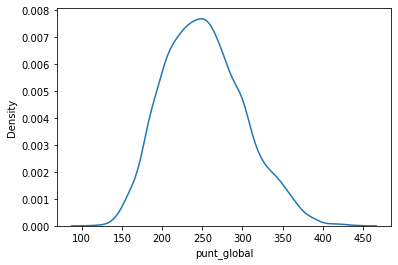

In [ ]:
# Descripción de la puntuación global - ¿Cómo es la distribución de las puntuaciones globales?

# sns.histplot(data=datos_icfes3, x="punt_global")
sns.kdeplot(data=datos_icfes3, x="punt_global")

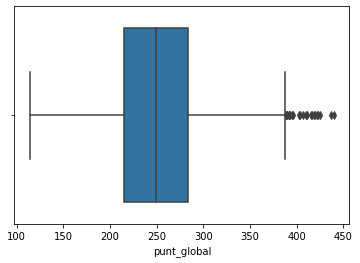

In [ ]:
# ¿Dónde se ubica el 50% central de los datos? ¿Existen datos atípicos? ¿Qué tan asimétricos son los datos?
sns.boxplot(x = datos_icfes3['punt_global'])

In [ ]:
# ¿Cómo es el comportamiento de los diferentes áreas del conocimiento?

tabla_calificaciones_req

,punt_ingles,punt_matematicas,punt_sociales_ciudadanas,punt_c_naturales,punt_lectura_critica,punt_global
0,53.32,40.78,NaN,NaN,NaN,NaN
1,37.1,46.77,NaN,NaN,NaN,NaN
2,94,88,NaN,NaN,NaN,NaN
3,71,66,70,65,69,339
4,71,66,70,65,69,339
...,...,...,...,...,...,...
49995,42,41,NaN,NaN,NaN,NaN
49996,66,76,NaN,NaN,NaN,NaN
49997,45,40,38,39,35,193
49998,47,39,NaN,NaN,NaN,NaN


# Gráficos que involucran más de una variable

Las variables tienen interconexion entre ellas y estructuras de dependencia. Para apreciar esto, se pueden realizar diferentes gráficos:

### Datos bivariados (2 variables)

2 cuali => Diagramas de barras por categorías

1 cuali y 1 cuanti => Histogramas, gráficos de densidad, boxplots

2 cuanti => diagrama de dispersión

In [ ]:
# Ejercicio: Poner la base con únicamente dos variables: El área de conocimiento y la puntuación.
# La base debe tener 2 columnas y 250000 filas

# base_ustedes.shape

tabla_calificaciones_req = datos_icfes3[['punt_ingles', 'punt_matematicas',
       'punt_sociales_ciudadanas', 'punt_c_naturales', 'punt_lectura_critica']]


datos_boxplots = pd.DataFrame(tabla_calificaciones_req.stack()).reset_index()
datos_boxplots.columns = ['persona', 'areaDesempeño', 'Puntuacion']
datos_boxplots

,persona,areaDesempeño,Puntuacion
0,0,punt_ingles,53.32
1,0,punt_matematicas,40.78
2,1,punt_ingles,37.10
3,1,punt_matematicas,46.77
4,2,punt_ingles,94.00
...,...,...,...
36840,9997,punt_lectura_critica,60.00
36841,9998,punt_ingles,36.00
36842,9998,punt_matematicas,43.00
36843,9999,punt_ingles,43.53


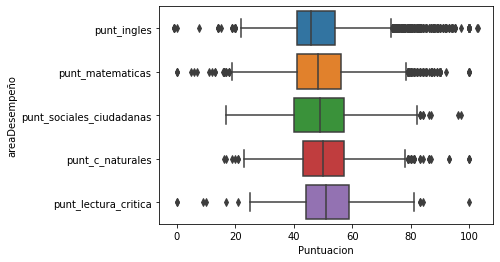

In [ ]:
sns.boxplot(y="areaDesempeño", x="Puntuacion", data=datos_boxplots)

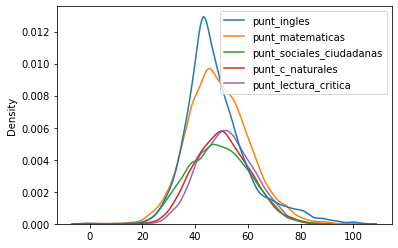

In [ ]:
sns.kdeplot(data=tabla_calificaciones_req)

In [ ]:
tabla_calificaciones_req = datos_icfes3[['punt_ingles', 'punt_matematicas',
       'punt_sociales_ciudadanas', 'punt_c_naturales', 'punt_lectura_critica', 'cole_area_ubicacion']]

In [ ]:
tabla_geo_punt = tabla_calificaciones_req.melt(id_vars=["cole_area_ubicacion"], 
        var_name="areaDesempeno", 
        value_name="Puntuacion")

tabla_geo_punt

,cole_area_ubicacion,areaDesempeno,Puntuacion
0,URBANO,punt_ingles,53.32
1,URBANO,punt_ingles,37.10
2,URBANO,punt_ingles,94.00
3,RURAL,punt_ingles,71.00
4,RURAL,punt_ingles,71.00
...,...,...,...
49995,URBANO,punt_lectura_critica,50.00
49996,URBANO,punt_lectura_critica,38.00
49997,URBANO,punt_lectura_critica,60.00
49998,URBANO,punt_lectura_critica,NaN


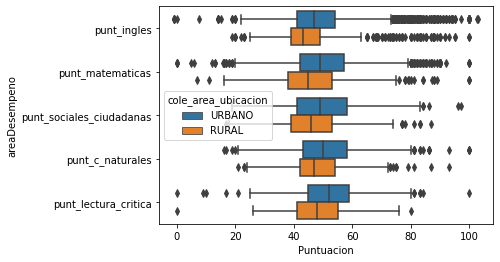

In [ ]:
sns.boxplot(y="areaDesempeno", x="Puntuacion", hue='cole_area_ubicacion', data=tabla_geo_punt)

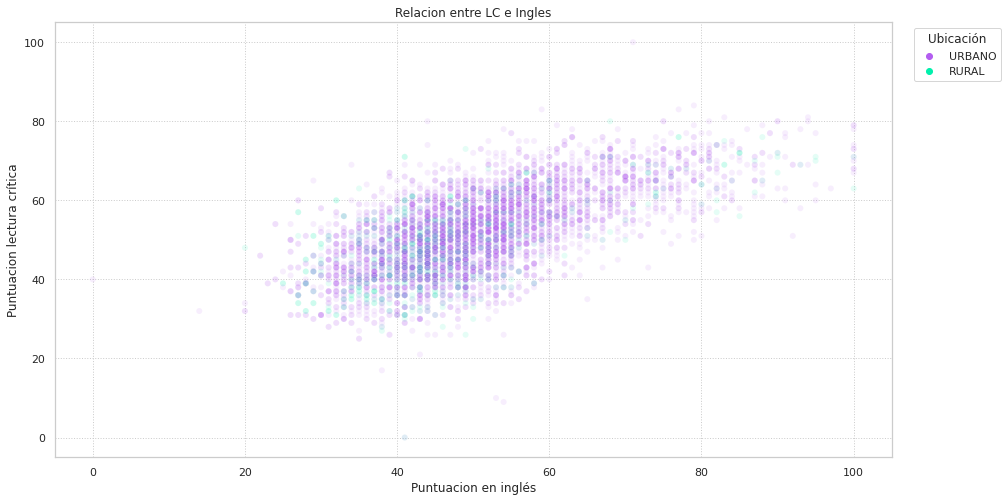

In [ ]:
import matplotlib.pyplot as plt
paleta = ['#B35DF0', '#00F0AC', '#00CAFA']
sns.set_palette(sns.color_palette(paleta))
sns.set_style("whitegrid", {"grid.color": "0.8", "grid.linestyle": ":"})
grafico1 = sns.scatterplot(data=tabla_calificaciones_req, x="punt_ingles", y="punt_lectura_critica", hue='cole_area_ubicacion', alpha=0.1)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', title='Ubicación')
grafico1.set(xlabel = "Puntuacion en inglés", ylabel = "Puntuacion lectura crítica", title= "Relacion entre LC e Ingles")
sns.set(rc = {'figure.figsize':(20,8)})


In [ ]:
Matriz_correlacion = tabla_calificaciones_req.corr()

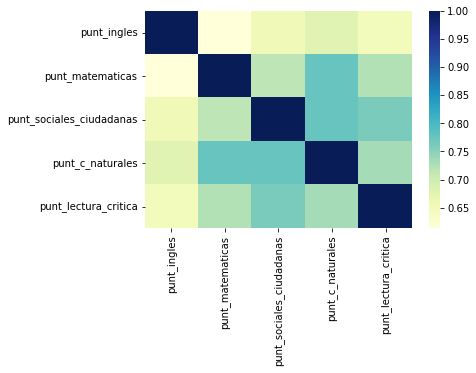

In [ ]:
sns.heatmap(Matriz_correlacion, cmap="YlGnBu")

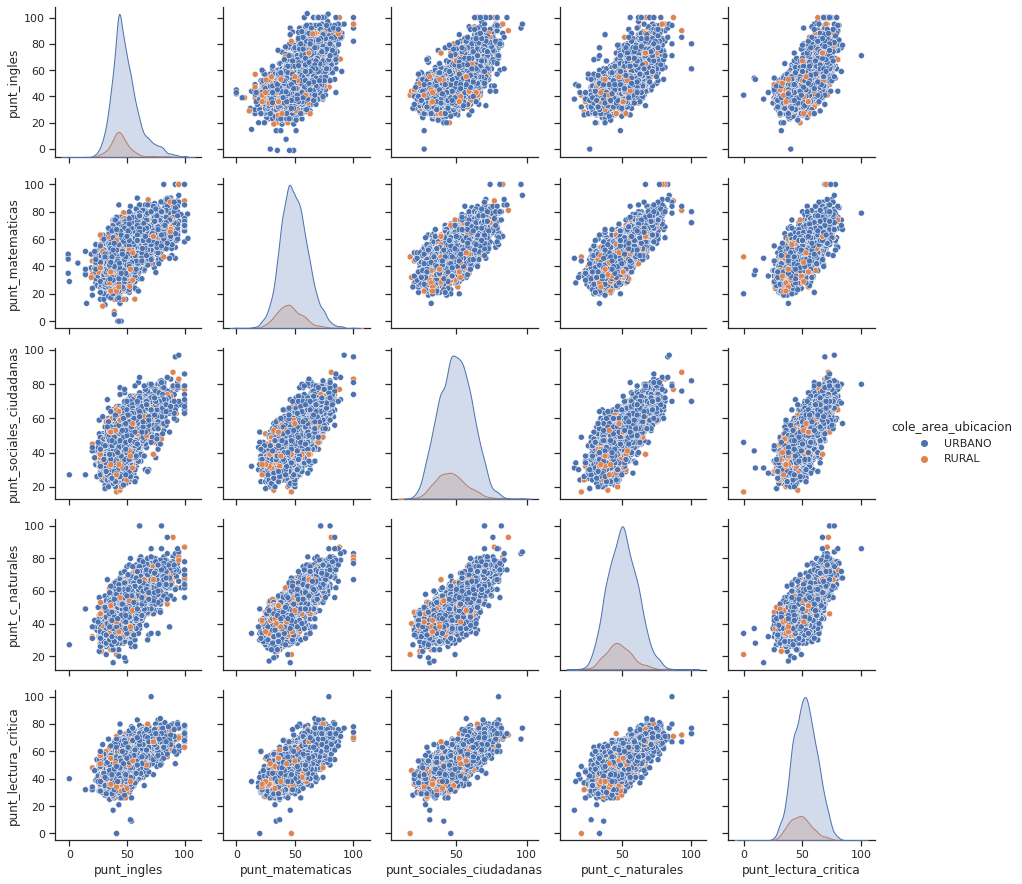

In [ ]:
sns.set_theme(style="ticks")
sns.pairplot(tabla_calificaciones_req, hue="cole_area_ubicacion")